# Final Project 3

# A. Perkenalan

**Kelompok 5 :**  

1. **Nabila Regitasyari Irmawan : PYTN-KS13-001**
2. **Muhammad Naufal Misbahuddin : PYTN-KS13-006**
3. **Nayla Salsabila Cindiva Utomo Putri : PYTN-KS13-022**

**Latar Belakang**

Project ini bertujuan untuk membuat model prediksi apakah akan turun hujan atau tidak pada wilayah Australia. Dataset yang digunakan diambil dari kaggle/Heart Failure Prediction (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

Dataset Heart Failure Prediction merupakan dataset yang berisi kumpulan data dengan 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Menggunakan bantuan machine learning, dataset ini dapat membantu dalam memprediksi fitur yang paling signifikan dalam menyebabkan kematian akibat gagal jantung.

# B. Import Pustaka

In [ ]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion matrix
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# C. Data Loading

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Melihat ukuran data(baris, kolom)
df.shape

(299, 13)

Terdapat 299 baris dan 13 kolom pada data prediksi keselamtan pasien dari penyakit jantung

In [ ]:
#Melihat 5 data teratas
pd.set_option('display.max_columns', None)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Pengecekan Nama Kolom
df.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [ ]:
#Melihat Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Analisis** 

Dapat dilihat pada info di atas, bahwa dataset hanya berisi variabel **numerik**, dimana terdapat **3 Variabel** yang memiliki tipe data `float64` dan terdapat **9 Variabel** memiliki tipe data `int64`. Hal tersebut perlu dipertanyakan, oleh karena terdapat kolom kategorik yang sudah diubah menjadi numerik untuk keperluan penelitian.

### Mengelompokan Data antara Numerikal dan Kategorikal

In [ ]:
numerical = []
categorical = []

In [ ]:
#Memeriksa nilai-nilai unik dalam kolom-kolom
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) <= 10:  #Anggap maksimal 10 nilai unik sebagai variabel kategorik
        categorical.append(column)
    else:
        numerical.append(column)

In [ ]:
#Melihat kolom numerical
numerical

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [ ]:
#Melihat Kolom Kategorikal
categorical

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

**Analisis** 

Dapat dilihat pada info terbaru di atas, bahwa dataset berisi variabel **numerik** dan **kategorik**, dimana terdapat **6 Variabel** yang memiliki tipe data kategorik dan terdapat **7 Variabel** memiliki tipe data `numerik.

### Melihat statistik deskriptif kolom numerikal

In [ ]:
df[numerical].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000



# D. Data Cleaning

Memeriksa Missing Value Semua Kolom

In [ ]:
df.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Semua kolom tidak memiliki *missing value*

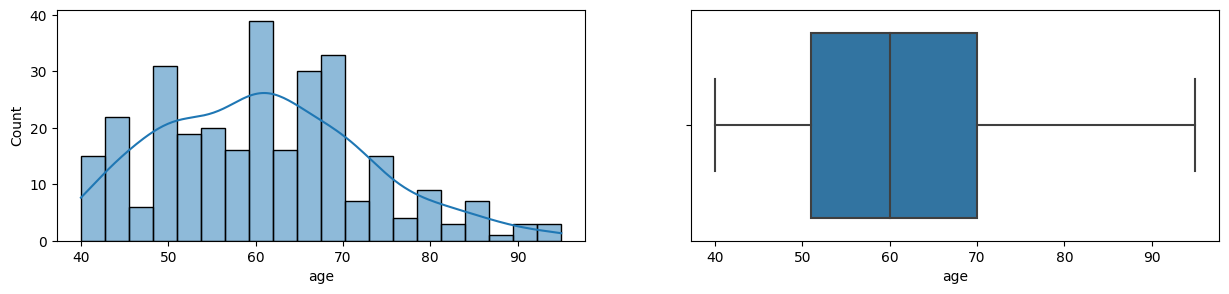

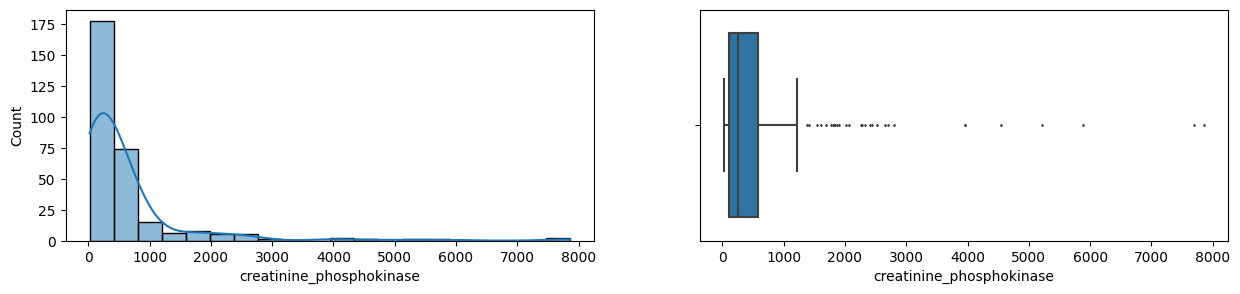

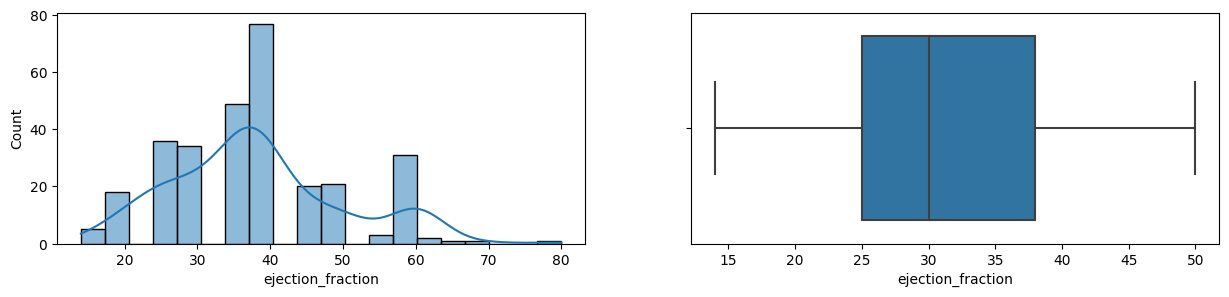

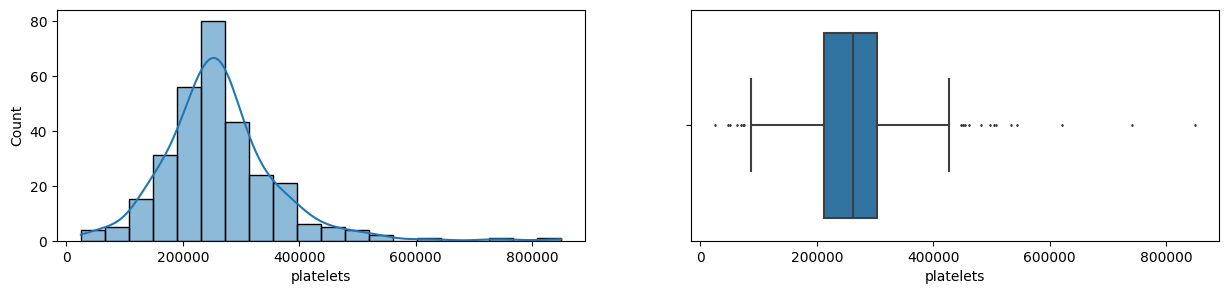

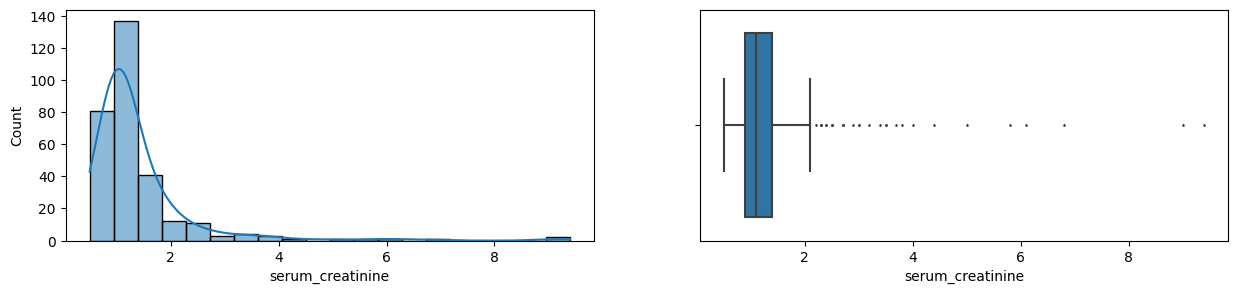

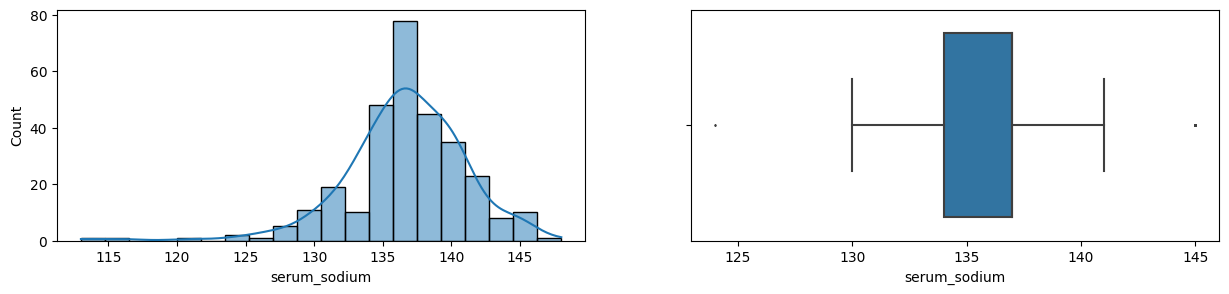

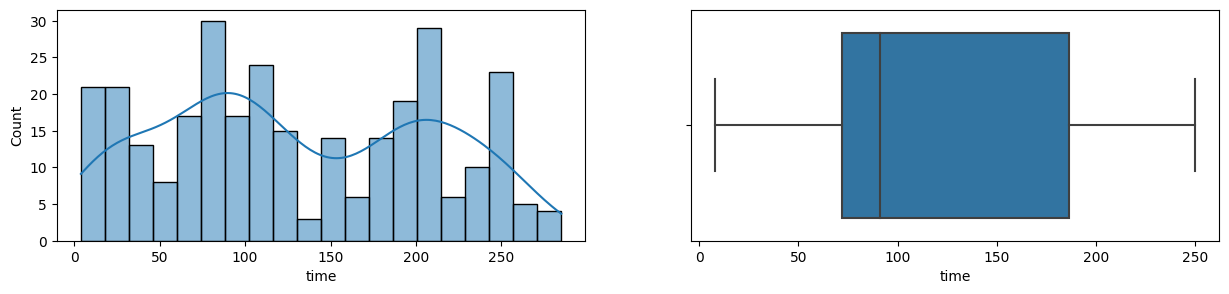

In [ ]:
#melihat visualisasi data box plot atau hist plot untuk menentukan data tersebut diganti dengan mean atau median.
for i in numerical:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0])
    sns.boxplot(data = df[i], x = df[i], ax = axs[1], fliersize=1)

**Analisis**

Berdasarkan visualisasi data di atas, tidak ada kolom yang merupakan outliers.

# E. Eksplorasi Data

In [ ]:
df.rename(columns={'age':'umur', 'anaemia':'anemia', 'creatinine_phosphokinase':'kreatin_fosfokinase', 'ejection_fraction':'fraksi_ejeksi', 'high_blood_pressure':'tekanan_darah_tinggi', 'serum_creatine':'kreatin_serum', 'serum_sodium':'sodium_kreatin', 'sex':'jenis_kelamin', 'smoking':'perokok', 'time':'waktu', 'DEATH_EVENT':'Kematian'}, inplace=True)
df.head()

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


0    203
1     96
Name: Kematian, dtype: int64


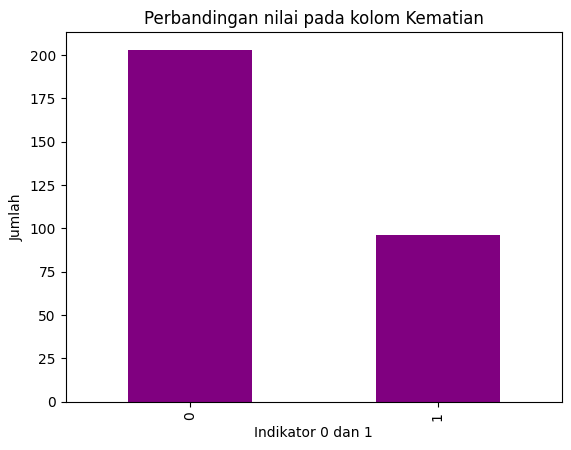

In [ ]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom "Kematian" dalam DataFrame "df"
value_counts = df["Kematian"].value_counts()

# Membuat grafik batang dengan menggunakan fungsi plot()
value_counts.plot(kind="bar", color='purple')

# Memberikan judul pada grafik
plt.title("Perbandingan nilai pada kolom Kematian")

# Memberikan label sumbu x
plt.xlabel("Indikator 0 dan 1")

# Memberikan label sumbu y
plt.ylabel("Jumlah")

# Menampilkan jumlah kemunculan setiap nilai pada kolom "Kematian"
print(value_counts)


**Analisis**

Dari grafik batang diatas dapat disimpulkan bahwa lebih banyak dengan nilai '0' (Tidak mengalami kematian) dibandingkan dengan nilai '1' (Mengalami kematian).

kolom kematian akan dijadikan kolom target, dari hal ini dapat dilihat bahwa kolom ini memiliki class imbalanced, yaitu salah satu class lebih sedikit dibandingkan class lainnya. Hal ini dapat dipertimbangkan dalam melakukan resampling

##Barplot

###Membandingkan kolom "perokok" dan "kematian"

([<matplotlib.axis.XTick at 0x7f740df6c400>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'Meninggal')])

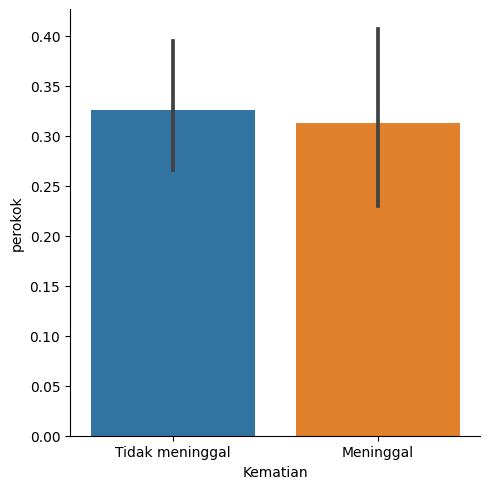

In [ ]:
# Memilih kolom 'perokok' dan 'Kematian' dari DataFrame 'df'
df[['perokok', 'Kematian']]

# Membuat grafik batang menggunakan seaborn catplot
sns.catplot(data=df, x='Kematian', y='perokok', kind='bar')

plt.xticks(ticks=(0,1), labels=['Tidak meninggal', 'Meninggal'])

**Analisis**

Dari barplot diatas dapat disimpulkan perbandingan antara tidak meninggal dan meninggal pada perokok hampir memiliki nilai yang sama

###Membandingkan kolom "anemia" dan "kematian"

([<matplotlib.axis.XTick at 0x7f740e6283a0>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'Meninggal')])

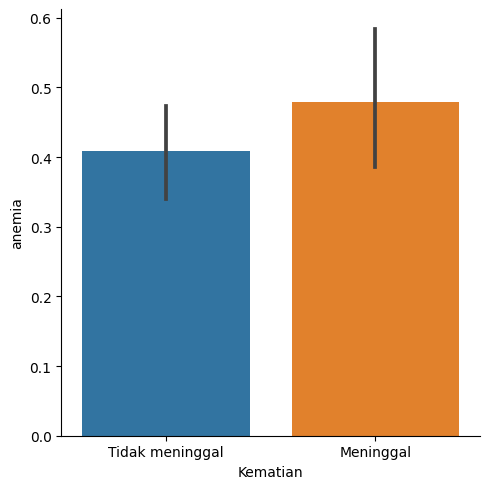

In [ ]:
df[['anemia', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='anemia', kind='bar')
plt.xticks(ticks=(0,1), labels=['Tidak meninggal', 'Meninggal'])

**Analisis**

Dari barplot di atas, dapat disimpulkan seseorang dengan kondisi anemia terdapat jumlah yang lebih besar mengalami kematian daripada yang tidak mengalami kematian. 
Hal ini menunjukkan bahwa penderita anemia memiliki potensi yang lebih tinggi untuk mengalami gagal jantung dan risiko kematian.

###Membandingkan kolom "kreatin_fosfokinase" dan "kematian"

([<matplotlib.axis.XTick at 0x7f74109480a0>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'Meninggal')])

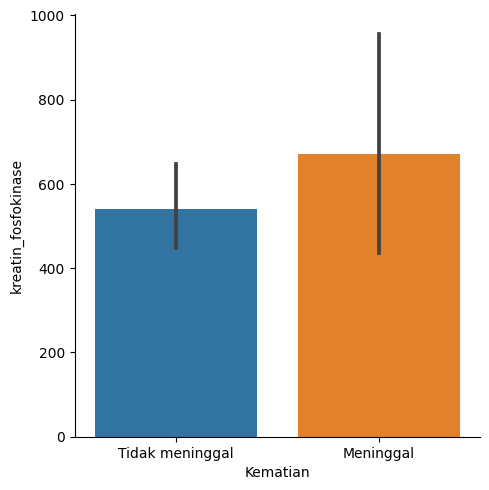

In [ ]:
df[['kreatin_fosfokinase', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='kreatin_fosfokinase', kind='bar')
plt.xticks(ticks=(0,1), labels=['Tidak meninggal', 'Meninggal'])

**Analisis**

Dari barplot di atas dapat disimpulkan penderita kreatin_fosfokinase, jumlah yang mengalami kematian juga lebih besar daripada yang tidak mengalami kematian. Hal ini menunjukan bahwa penderita kreatin_fosfokinase juga berpotensi mengalami gagal jantung dan mengalami resiko kematian

###Membandingkan kolom "diabetes" dan "kematian"

([<matplotlib.axis.XTick at 0x7f740ff81d80>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'Meninggal')])

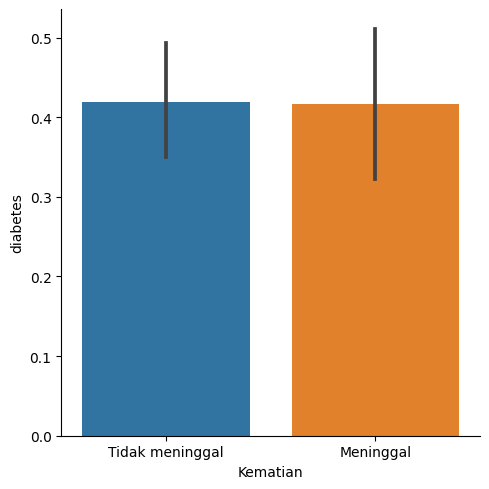

In [ ]:
df[['diabetes', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='diabetes', kind='bar')
plt.xticks(ticks=(0,1), labels=['Tidak meninggal', 'Meninggal'])

**Analisis**

Dari barplot diatas dapat disimpulkan perbandingan antara tidak meninggal dan meninggal pada penderita diabetes hampir memiliki nilai yang sama

###Membandingkan kolom "tekanan_darah_tinggi" dan "kematian"

([<matplotlib.axis.XTick at 0x7f74104b6fb0>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'Meninggal')])

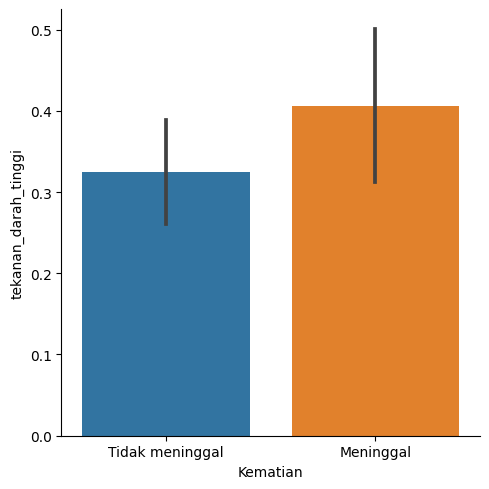

In [ ]:
df[['tekanan_darah_tinggi', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='tekanan_darah_tinggi', kind='bar')
plt.xticks(ticks=(0,1), labels=['Tidak meninggal', 'Meninggal'])

**Analisis**

Dari barplot di atas dapat disimpulkan penderita tekanan darah tinggi, memiliki jumlah yang mengalami kematian lebih besar daripada yang tidak mengalami kematian. Hal ini menunjukkan penderita tekanan darah tinggi juga berpotensi mengalami gagal jantung dan resiko kematian

###Membandingkan kolom "serum_creatinine" dan "kematian"

([<matplotlib.axis.XTick at 0x7f7410334970>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'Meninggal')])

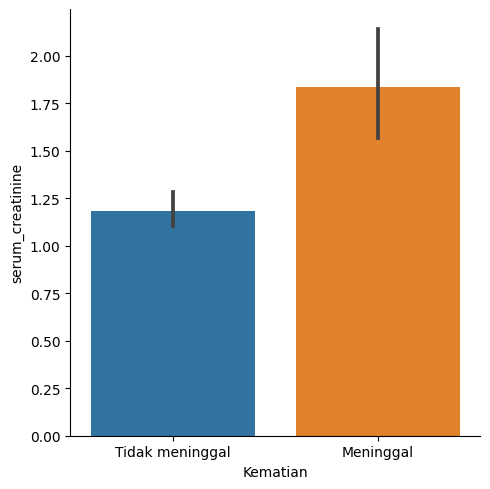

In [ ]:
df[['serum_creatinine', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='serum_creatinine', kind='bar')
plt.xticks(ticks=(0,1), labels=['Tidak meninggal', 'Meninggal'])

**Analisis**

Dari barplot di atas dapat disimpulkan penderita serum_creatin memiliki jumlah yang mengalami kematian jauh lebih besar daripada yang tidak mengalami kematian. maka penderita serum_creatin juga berpotensi mengalami gagal jantung dan resiko kematian.

###Membandingkan kolom "umur" dan "kematian"

([<matplotlib.axis.XTick at 0x7f740ccd4610>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'Meninggal')])

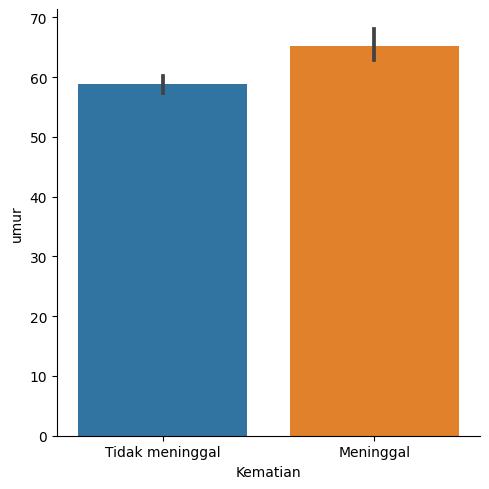

In [ ]:
df[['umur', 'Kematian']]
sns.catplot(data=df, x='Kematian', y='umur', kind='bar')
plt.xticks(ticks=(0,1), labels=['Tidak meninggal', 'Meninggal'])

**Analisis**

Dari barplot di atas dapat disimpulkan umur tidak terlalu mempengaruhi peningkatan jumlah kematian pada orang. Namun pada usia yang semakin lanjut, tingkat kematian akan selalu ada dan tingkat tidak meninggal akan semakin minim. Terutama pada lansia berumur 60 tahun lebih rentan untuk mengalami resiko kematian

([<matplotlib.axis.XTick at 0x7f740c5f3760>,
 [Text(0, 0, 'Tidak meninggal'), Text(1, 0, 'Meninggal')])

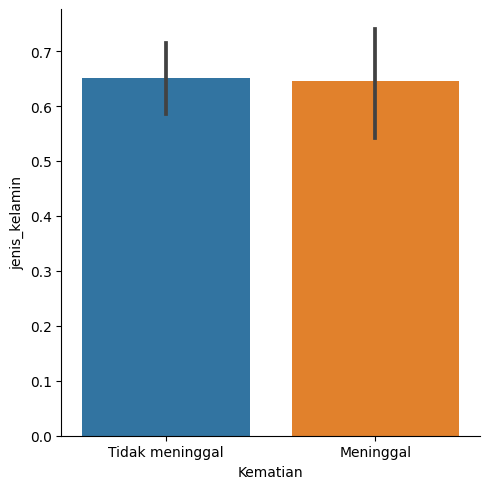

In [ ]:
# Memilih kolom 'jenis_kelamin' dan 'Kematian' dari DataFrame 'df'
df[['jenis_kelamin', 'Kematian']]

# Membuat grafik batang menggunakan seaborn catplot
sns.catplot(data=df, x='Kematian', y='jenis_kelamin', kind='bar')

plt.xticks(ticks=(0,1), labels=['Tidak meninggal', 'Meninggal'])

In [ ]:
df.jenis_kelamin.value_counts()

1    194
0    105
Name: jenis_kelamin, dtype: int64

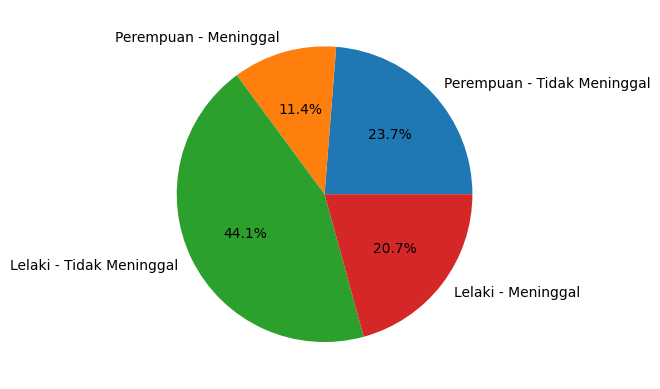

In [ ]:
# Mengelompokkan DataFrame 'df' berdasarkan kolom 'jenis_kelamin' dan 'Kematian',
# kemudian menghitung jumlah data pada setiap kombinasi kategori
jk_group = df.groupby(['jenis_kelamin', 'Kematian']).size()

plt.pie(jk_group, labels=['Perempuan - Tidak Meninggal', 'Perempuan - Meninggal',
                          'Lelaki - Tidak Meninggal', 'Lelaki - Meninggal'],
                           autopct='%1.1f%%')

# Menampilkan grafik pie
plt.show()


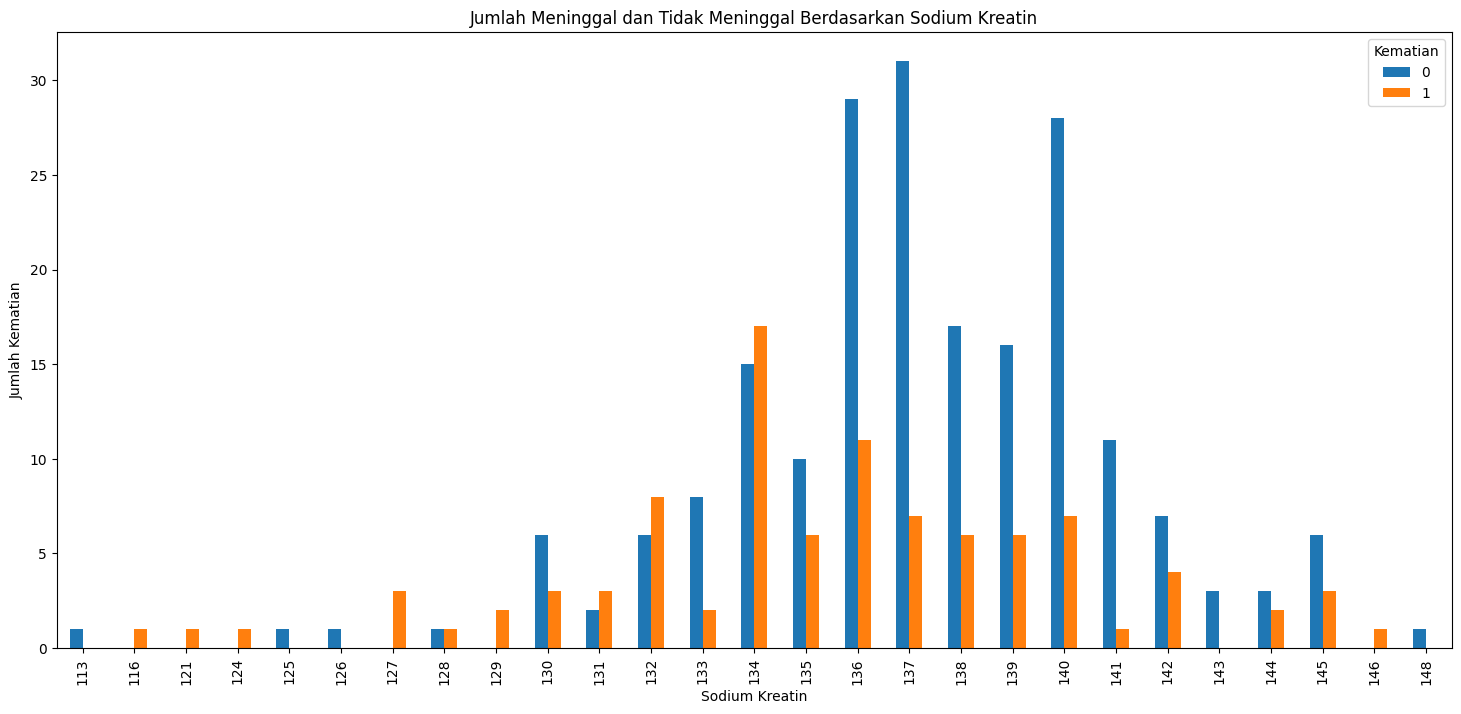

In [ ]:
# Mengelompokkan DataFrame 'df' berdasarkan kolom 'sodium_kreatin' dan 'Kematian',
# kemudian menghitung jumlah data pada setiap kombinasi kategori dan mengubahnya menjadi bentuk tabel
sodium_counts = df.groupby(['sodium_kreatin', 'Kematian']).size().unstack()

sodium_counts.plot(kind='bar', stacked=False, figsize=(18, 8))

plt.xlabel('Sodium Kreatin')

plt.ylabel('Jumlah Kematian')

plt.title('Jumlah Meninggal dan Tidak Meninggal Berdasarkan Sodium Kreatin')

plt.show()

**Analisa**

Pada kadar sodium kreatin 132 -140, jumlah kematian pada seseorang semakin tinggi

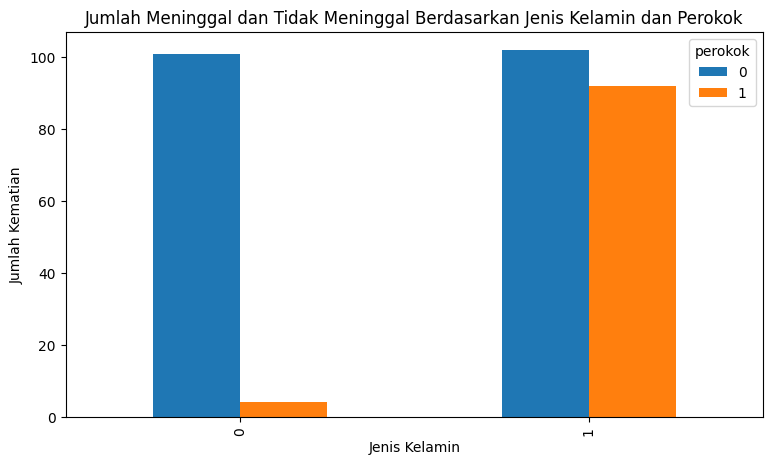

In [ ]:
# Mengelompokkan DataFrame 'df' berdasarkan kolom 'jenis_kelamin' dan 'perokok',
# kemudian menghitung jumlah data pada setiap kombinasi kategori dan mengubahnya menjadi bentuk tabel
age_counts = df.groupby(['jenis_kelamin', 'perokok']).size().unstack()

age_counts.plot(kind='bar', stacked=False, figsize=(9, 5))

plt.xlabel('Jenis Kelamin')

plt.ylabel('Jumlah Kematian')

plt.title('Jumlah Meninggal dan Tidak Meninggal Berdasarkan Jenis Kelamin dan Perokok')

plt.show()

**Analisis**

label 0 merupakan Male dan label 1 merupakan Female

dapat dilihat pada bar chart bahwa dari label 0 Male dengan label 0 perokok yang ditandai warna biru bahwa lelaki lebih banyak yang merokok dibandingkan tidak merokok

sedangkan pada perempuan, jumlah perokok dan tidak perokok hampir imbang

# F. Data Preprocessing



In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head()

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df_copy.columns.values

array(['umur', 'anemia', 'kreatin_fosfokinase', 'diabetes',
       'fraksi_ejeksi', 'tekanan_darah_tinggi', 'platelets',
       'serum_creatinine', 'sodium_kreatin', 'jenis_kelamin', 'perokok',
       'waktu', 'Kematian'], dtype=object)

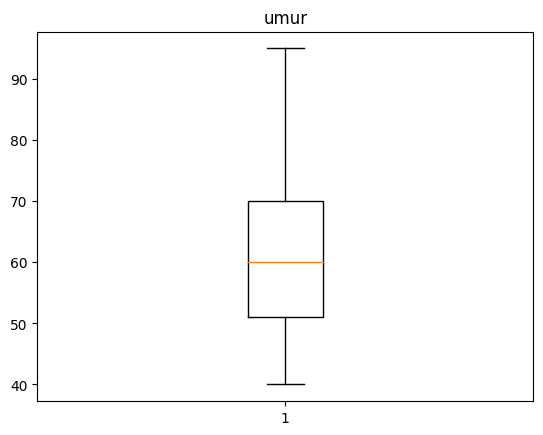

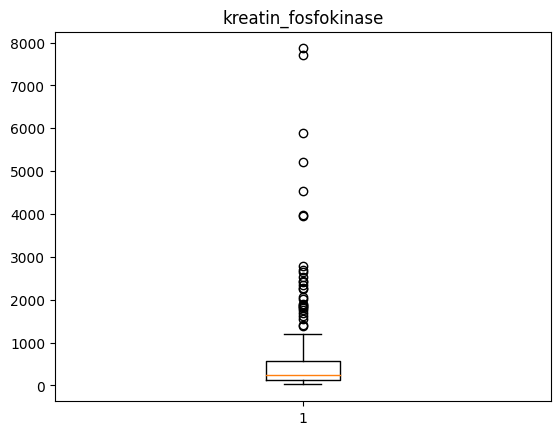

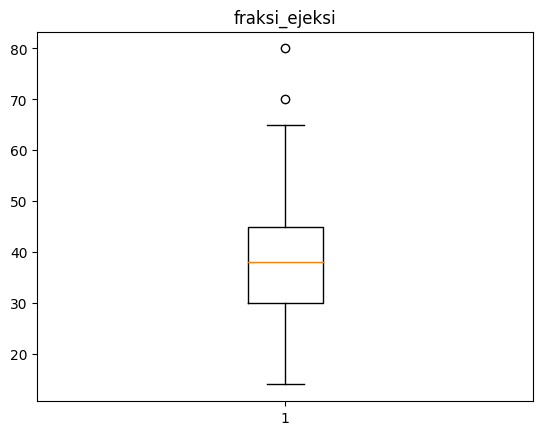

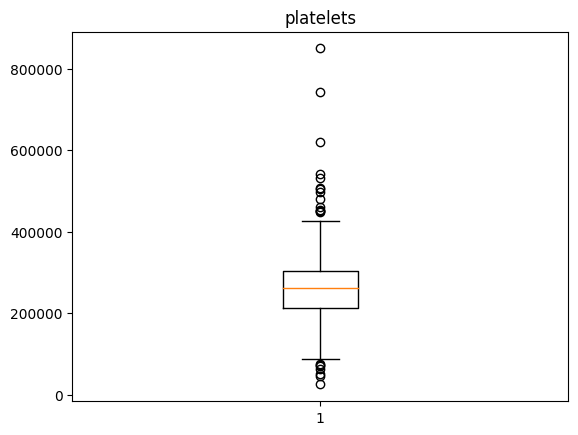

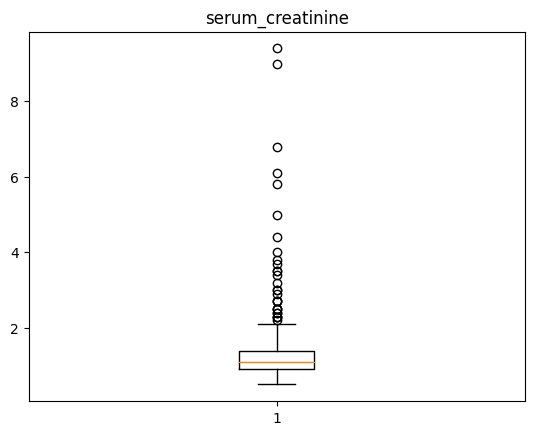

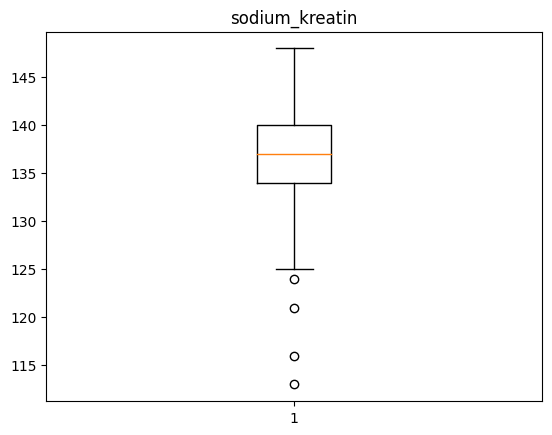

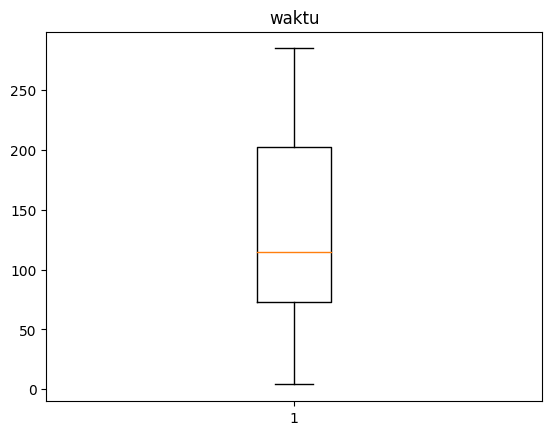

In [ ]:
numerical= ['umur', 'kreatin_fosfokinase', 'fraksi_ejeksi', 'platelets', 'serum_creatinine', 'sodium_kreatin', 'waktu'] #numerical_features

#creating boxplot for every numerical feature

for col in df_copy[numerical]:
    plt.boxplot(df_copy[col], vert= True)
    plt.title(col)
    plt.show()

**Analisis**

pada output pendeteksi outlier dari kolom dengan data yang bersifat numerical di atas dapat dilihat bahwa kolom:
+ fraksi ejeksi
+ kreatin fosfokinase
+ platelets
+ serum creatinine
+ sodium kreatin

memiliki outlier yang banyak. Sehingga, harus dibersihkan outlier pada data

In [ ]:
def remove_outlier(df_model):
    Q1 = df_model.quantile(0.25)
    Q3 = df_model.quantile(0.75)
    IQR = Q3 - Q1
    df_model = df_model[~((df_model < (Q1 - 1.5 * IQR)) | (df_model > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_model

In [ ]:
def remove_outliers(df_copy):
    for col in df_copy.columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df_copy = df_copy[(df_copy[col] > lower_bound) & (df_copy[col] < upper_bound)]
    return df_copy

df_copy= remove_outliers(df_copy)

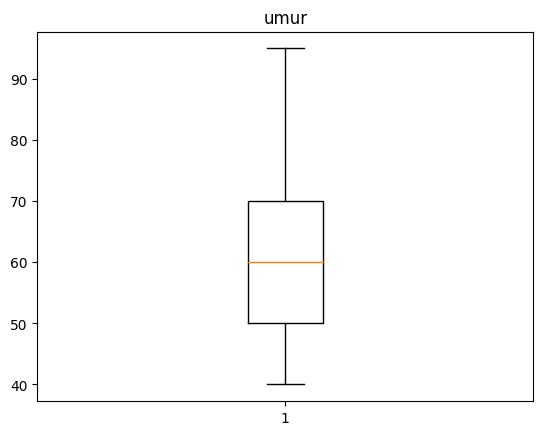

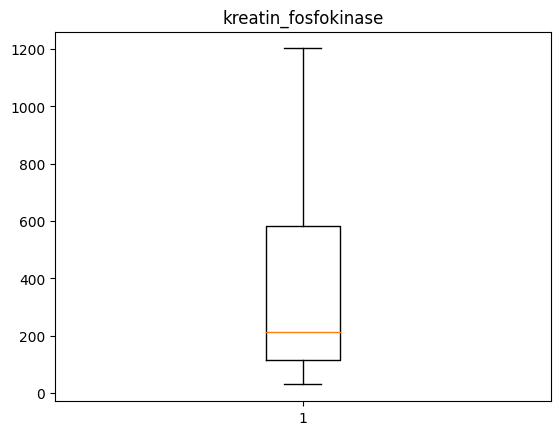

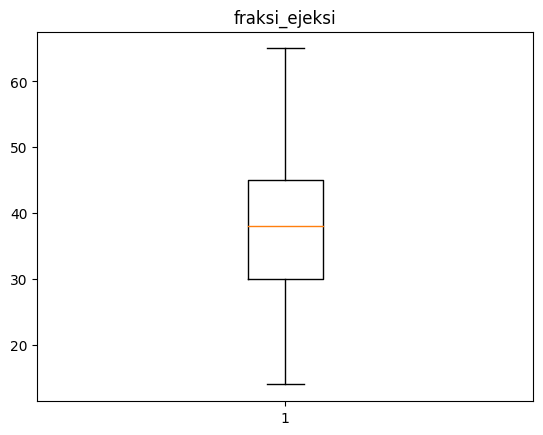

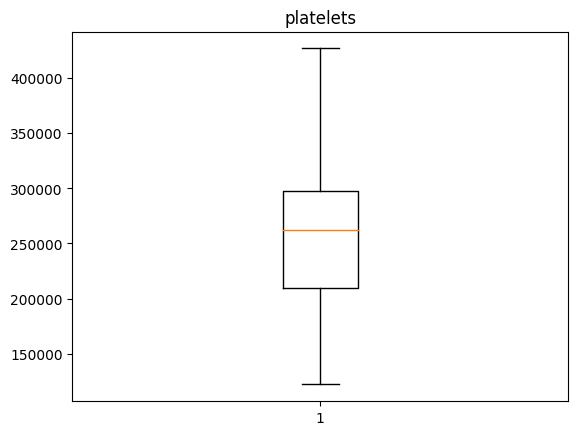

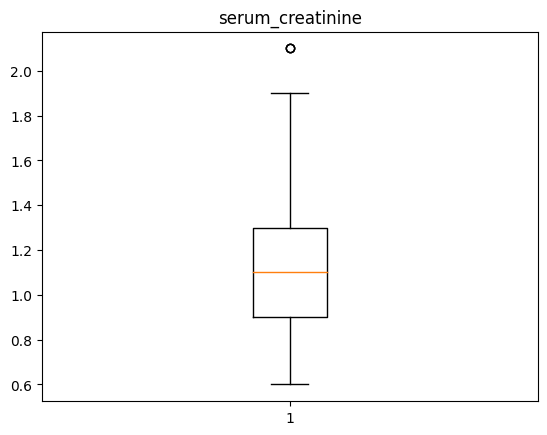

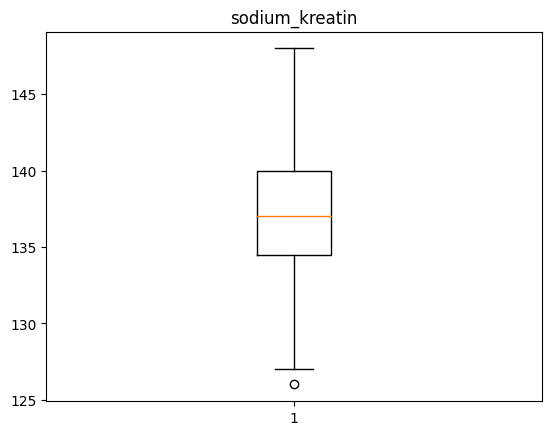

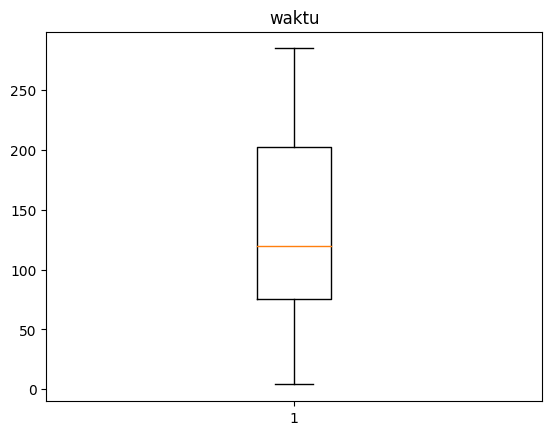

In [ ]:
for col in df_copy[numerical]:
    plt.boxplot(df_copy[col], vert= True)
    plt.title(col)
    plt.show()

Outlier pada data sudah berhasil dihilangkan sebagian besarnya

Melakukan Encoding Data

In [ ]:
df_copy = pd.get_dummies(df_copy)
df_copy

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,Kematian
0,75.000,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
2,65.000,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
8,65.000,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
11,62.000,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
12,45.000,1,981,0,30,0,136000.00,1.10,137,1,0,11,1
13,50.000,1,168,0,38,1,276000.00,1.10,137,1,0,11,1
14,49.000,1,80,0,30,1,427000.00,1.00,138,0,0,12,0


Membagi prdictors dengan respon

In [ ]:
x = df_copy[['umur','anemia','kreatin_fosfokinase','diabetes','fraksi_ejeksi','tekanan_darah_tinggi','serum_creatinine','sodium_kreatin','jenis_kelamin','perokok','waktu']]
y = df_copy['Kematian']

## Kolerasi Matrix

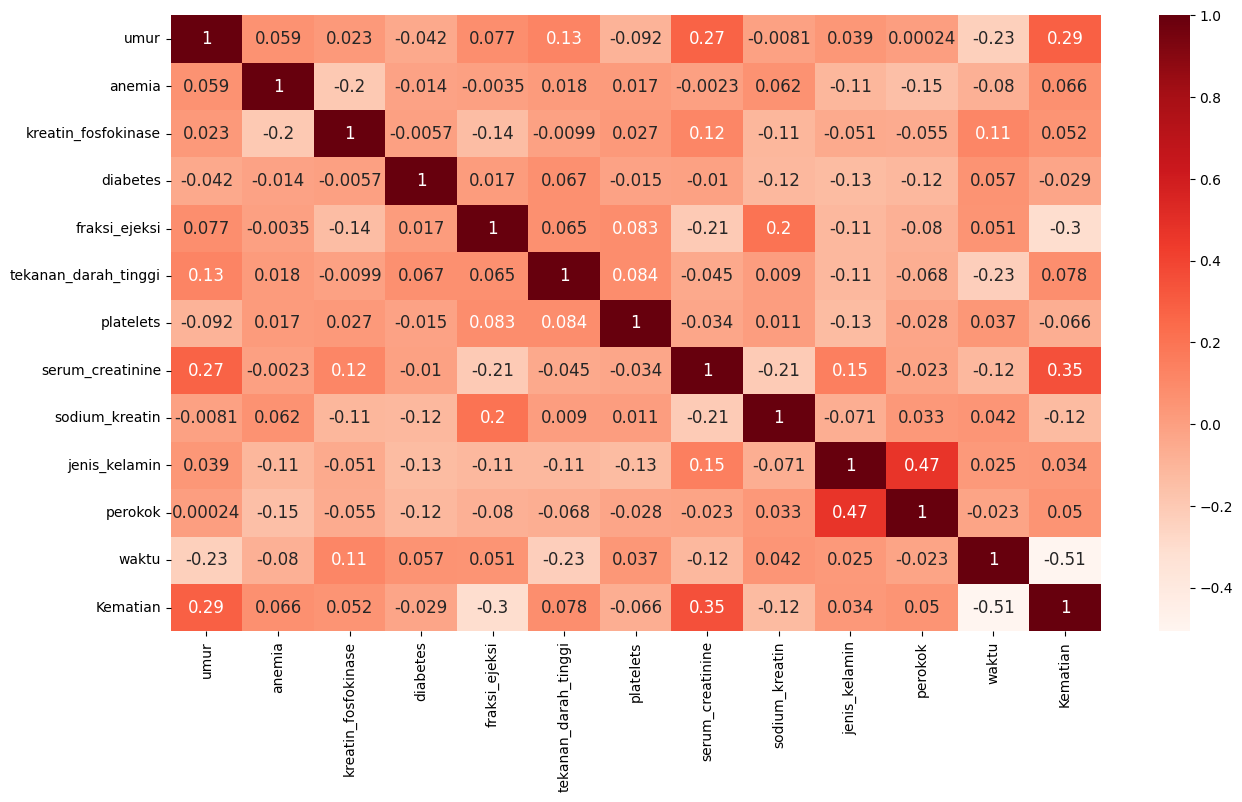

In [ ]:
matriksCorr = df_copy.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matriksCorr, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

Pada correlation map di atas setelah dilakukan penghapusan outlier, tidak terdapat hasil korelasi yang bagus dan agak bagus.

*   Hasil korelasi yang memiliki korelasi linear positif adalah hubungan antara jenis kelamin dengan perokok serta hubungan kematian dengan serum creatinine dan umur
*   Hasil korelasi yang memiliki korelasi linear negatif adalah hubungan antara waktu (dihitung dalam hari untuk follow up medical) dengan kematian. Hal ini belum tentu menjadi sebab akibat suatu kematian yang pasti karena diperlukan fitur lainnya.

In [ ]:
#Melihat niali korelasi antara predictors dan respon
Korelasi = df.corrwith(y)
print("Korelasi dengan variable respon : ")
print(Korelasi)

Korelasi dengan variable respon : 
umur                    0.286517
anemia                  0.066063
kreatin_fosfokinase     0.052356
diabetes               -0.029368
fraksi_ejeksi          -0.302961
tekanan_darah_tinggi    0.077649
platelets              -0.065676
serum_creatinine        0.351663
sodium_kreatin         -0.124443
jenis_kelamin           0.033859
perokok                 0.049589
waktu                  -0.506752
Kematian                1.000000
dtype: float64


# G. Pendefinisian Model

Menggunakan metode yang telah ditetapkan pada Final Project 3 ini yaitu Logistic Regression, KNN, Decission Tree, Random Forest, Naive Bayes, dan Confussion Matrix kami berharap dapat membantu dalam memprediksi probabilitas kematian melalui data heart_failure_clinical_records_dataset.csv dengan variable respon yaitu menunjukkan apakah seorang penderita mengalami penyakit gagal jantung dan tidak sampai memiliki resiko kematian_YES dengan angka 0 dan juga mengalami penyakit jantung dan memiliki resiko kematian_No dengan angka 1.


Variabel yang dipilih untuk digunakan sebagai fitur dalam pembuatan model adalah ''umur', 'anemia', 'diabetes', 'fraksi_ejeksi', 'tekanan_darah_tinggi', 'serum_creatinine', 'sodium_kreatin', 'jenis_kelamin', 'perokok', dan 'waktu'.

In [ ]:
#logistic regression
model_logit = LogisticRegression()

In [ ]:
#KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#SVM
model_svm = SVC()

In [ ]:
#Decission Tree
model_dt = DecisionTreeClassifier()

In [ ]:
#Random Forest
model_rf = RandomForestClassifier()

In [ ]:
#Naive Bayes
model_nb = GaussianNB()

# H.Pelatihan Model


In [ ]:
#Melatih data model
model_logit.fit(X_train, y_train)

print('Intercept:', model_logit.intercept_)
print('Coefficients: ', model_logit.coef_)

Intercept: [0.07708462]
Coefficients:  [[ 6.01376850e-02  1.30437648e-01  6.09234978e-04 -1.28200164e-01
  -5.86451306e-02 -2.05029802e-01  1.52521672e+00 -1.10784132e-02
  -5.91855524e-01 -3.32658788e-02 -2.38968150e-02]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Analisis**

Berdasarkan hasil pelatihan model diatas, didapatkan nilai log-odds ketika semua variabel prediktor memiliki nilai 0 sebesar 0.08315816. Selain itu juga didapatkan nilai koefisien setiap variabel prediktor


In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_logit = model_logit.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_logit = mean_squared_error(y_test, y_pred_logit, squared=False)

In [ ]:
#Menghitung MAE
mae_logit = mean_absolute_error(y_test, y_pred_logit)

In [ ]:
#Menghitung akurasi model
accuracy_logit = accuracy_score(y_test, y_pred_logit)

### KNN

In [ ]:
#Melatih data model
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_knn = model_knn.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)

In [ ]:
#Menghitung MAE
mae_knn = mean_absolute_error(y_test, y_pred_knn)

In [ ]:
#Menghitung akurasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

##SVM

In [ ]:
#Melatih data model
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_svm = model_svm.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)

In [ ]:
#Menghitung MAE
mae_svm = mean_absolute_error(y_test, y_pred_svm)

In [ ]:
#Menghitung akurasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

##Decision Tree

In [ ]:
#Melatih data model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_dt = model_dt.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

In [ ]:
#Menghitung MAE
mae_dt = mean_absolute_error(y_test, y_pred_dt)

In [ ]:
#Menghitung akurasi model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

##Random Forest

In [ ]:
#Melatih data model
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_rf = model_rf.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [ ]:
#Menghitung MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [ ]:
#Menghitung akurasi model
accuracy_rf = model_rf.score(X_test, y_test)

##Naive Bayes

In [ ]:
#Melatih data model
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Melakukan prediksi menggunakan data uji
y_pred_nb = model_nb.predict(X_test)

In [ ]:
#Menghitung RMSE
rmse_nb = mean_squared_error(y_test, y_pred_nb, squared=False)

In [ ]:
#Menghitung MAE
mae_nb = mean_absolute_error(y_test, y_pred_nb)

In [ ]:
#Menghitung akurasi model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# I. Evaluasi Model

##Logistic Regression

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_logit)
print('RMSE:', rmse_logit)
print('MAE:', mae_logit)
print('Classification Report:')
print(classification_report(y_test, y_pred_logit))

Accuracy: 0.835820895522388
RMSE: 0.4051902077760665
MAE: 0.16417910447761194
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.70      0.74      0.72        19

    accuracy                           0.84        67
   macro avg       0.80      0.81      0.80        67
weighted avg       0.84      0.84      0.84        67



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar 0.835820895522388, artinya model mampu melakukan prediksi yang benar sekitar 83.58% dari total data.
* RMSE sebesar 0.4051902077760665 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 0.16417910447761194 menunjukkan kesalahan rata-rata mutlak model.

##KNN

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_knn)
print('RMSE:', rmse_knn)
print('MAE:', mae_knn)
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.746268656716418
RMSE: 0.5037175233040658
MAE: 0.2537313432835821
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.56      0.53      0.54        19

    accuracy                           0.75        67
   macro avg       0.69      0.68      0.68        67
weighted avg       0.74      0.75      0.74        67



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar  0.746268656716418, artinya model mampu melakukan prediksi yang benar sekitar 74.62% dari total data.
* RMSE sebesar 0.5037175233040658 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar  0.2537313432835821 menunjukkan kesalahan rata-rata mutlak model.

##Decision Tree

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_dt)
print('RMSE:', rmse_dt)
print('MAE:', mae_dt)
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7313432835820896
RMSE: 0.5183210553488161
MAE: 0.26865671641791045
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        48
           1       0.52      0.58      0.55        19

    accuracy                           0.73        67
   macro avg       0.67      0.69      0.68        67
weighted avg       0.74      0.73      0.74        67



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar 0.7313432835820896, artinya model mampu melakukan prediksi yang benar sekitar 73.13% dari total data.
* RMSE sebesar 0.5183210553488161 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 0.26865671641791045 menunjukkan kesalahan rata-rata mutlak model.

##Random Forest

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_rf)
print('RMSE:', rmse_rf)
print('MAE:', mae_rf)
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7910447761194029
RMSE: 0.45711620391383745
MAE: 0.208955223880597
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.62      0.68      0.65        19

    accuracy                           0.79        67
   macro avg       0.74      0.76      0.75        67
weighted avg       0.80      0.79      0.79        67



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar  0.7910447761194029, artinya model mampu melakukan prediksi yang benar sekitar 79.10% dari total data.
* RMSE sebesar 0.45711620391383745 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 0.208955223880597 menunjukkan kesalahan rata-rata mutlak model.

##Naive Bayes

In [ ]:
#Menampilkan hasil evaluasi
print('Accuracy:', accuracy_nb)
print('RMSE:', rmse_nb)
print('MAE:', mae_nb)
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.7611940298507462
RMSE: 0.4886777774252209
MAE: 0.23880597014925373
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        48
           1       0.59      0.53      0.56        19

    accuracy                           0.76        67
   macro avg       0.70      0.69      0.70        67
weighted avg       0.75      0.76      0.76        67



**Analisis**

Berdasarkan hasil evaluasi model diatas, didapatkan beberapa informasi model sebagai berikut:
* Model memiliki nilai akurasi sebesar  0.7611940298507462, artinya model mampu melakukan prediksi yang benar sekitar 76.11% dari total data.
* RMSE sebesar 0.4886777774252209 menunjukkan tingkat kesalahan rata-rata model.
* MAE sebesar 0.23880597014925373 menunjukkan kesalahan rata-rata mutlak model.

#J. Model Inference

In [ ]:
umur = float(input('umur : ')) #Inputkan umur
anemia = float(input('anemia : ')) # 0/1
diabetes = float(input('diabetes : ')) # 0/1
tekanan_darah_tinggi = float(input('Tekanan Darah Tinggi : ')) #0/1
jenis_kelamin = float(input('Jenis Kelamin : ')) #0/1
perokok = float(input('Perokok : ')) #0/1

Kematian = (np.exp(0.07 + (6.013*umur) + (1.30*anemia) + (-1.28*diabetes) +  + (-2.05*tekanan_darah_tinggi)  +  (-3.32658788*jenis_kelamin) + (-2.38968150*perokok) / (1+np.exp(0.07 + (6.01*umur) + (1.30*anemia) +  (-1.28*diabetes) +  (-2.05029802*tekanan_darah_tinggi) +  (-3.32*jenis_kelamin) + (-2.38*perokok)))))
print("Kemungkinan meninggal dengan beberapa faktor yang diinputkan adalah : ", Kematian)

umur : 56
anemia : 1
diabetes : 1
Tekanan Darah Tinggi : 1
Jenis Kelamin : 0
Perokok : 1
Kemungkinan meninggal dengan beberapa kemungkinan yang diinputkan adalah :  2.4428405349297094e+145


#K. Kesimpulan

Untuk menemukan penyebab kematian paling besar berdasarkan beberapa variabel seperti, 'umur', 'anemia', 'fraksi_ejeksi', 'tekanan_darah_tinggi', 'serum_creatinine','sodium_kreatin','jenis_kelamin', 'perokok', dan 'waktu'. Dengan beberapa model percobaan(logistic regression, random forest, ,Decission Tree,KNN, Naive Bayes).

Dari hasil perhitungan dengan beberapa model yang kami buat di dapat hasil sebagai berikut :
1. Logistic Regression dengan akurasi sebesar : 83%
2. KNN dengan akurasi sebesar : 74%
3. Decission Tree dengan akurasi : 73%
4. Random forest sebesar : 79%
5. Naive Bayes sebesar : 76%

dari kelima model tersebut didapat hasil perhitungan prediksi terbaik terhadap penyebab kematian dengan beberapa variabel yang dijadikan predictors bahwa hasil dengan logistic regression dengan hasil terbaik 83%.
